In [1]:
# Install
# install.packages("tm")  # for text mining
# install.packages("SnowballC") # for text stemming
# install.packages("wordcloud") # word-cloud generator 
# install.packages("RColorBrewer") # color palettes
# Load
library("tm")
library("SnowballC")
library("wordcloud")
library("RColorBrewer")

Warning message:
"package 'tm' was built under R version 3.6.3"
Loading required package: NLP

Warning message:
"package 'wordcloud' was built under R version 3.6.3"
Loading required package: RColorBrewer



In [2]:
# Step 3
# John F Kennedy Moon Speech
# September 12, 1962
# https://er.jsc.nasa.gov/seh/ricetalk.htm

filePath <- "https://raw.githubusercontent.com/CMorar143/datavis/master/Labs/Lab8/Data/kennedy_moon_speech.txt"
text <- readLines(filePath)
docs <- Corpus(VectorSource(text))

Warning message in readLines(filePath):
"incomplete final line found on 'https://raw.githubusercontent.com/CMorar143/datavis/master/Labs/Lab8/Data/kennedy_moon_speech.txt'"


In [3]:
# Step 4
inspect(docs)

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 61

 [1] I am delighted to be here, and I'm particularly delighted to be here on this occasion.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [4]:
# Step 5
# toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
# docs <- tm_map(docs, toSpace, "/")
# docs <- tm_map(docs, toSpace, "@")
# docs <- tm_map(docs, toSpace, "\\|")
                               
# Convert the text to lower case
docs <- tm_map(docs, content_transformer(tolower))
                               
# Remove numbers
docs <- tm_map(docs, removeNumbers)
                               
# Remove english common stopwords
docs <- tm_map(docs, removeWords, stopwords("english"))
                               
# Remove punctuations
docs <- tm_map(docs, removePunctuation)
                               
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)
                               
# Step 6
inspect(docs)

Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
"transformation drops documents"


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 61

 [1]  delighted particularly delighted occasion                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2]                                                                                                                                                                                                                                         

word      freq
new       new       22  
will      will      22  
space     space     22  
years     years     10  
man       man       10  
knowledge knowledge  9  
first     first      7  
moon      moon       7  
city      city       6  
decade    decade     6

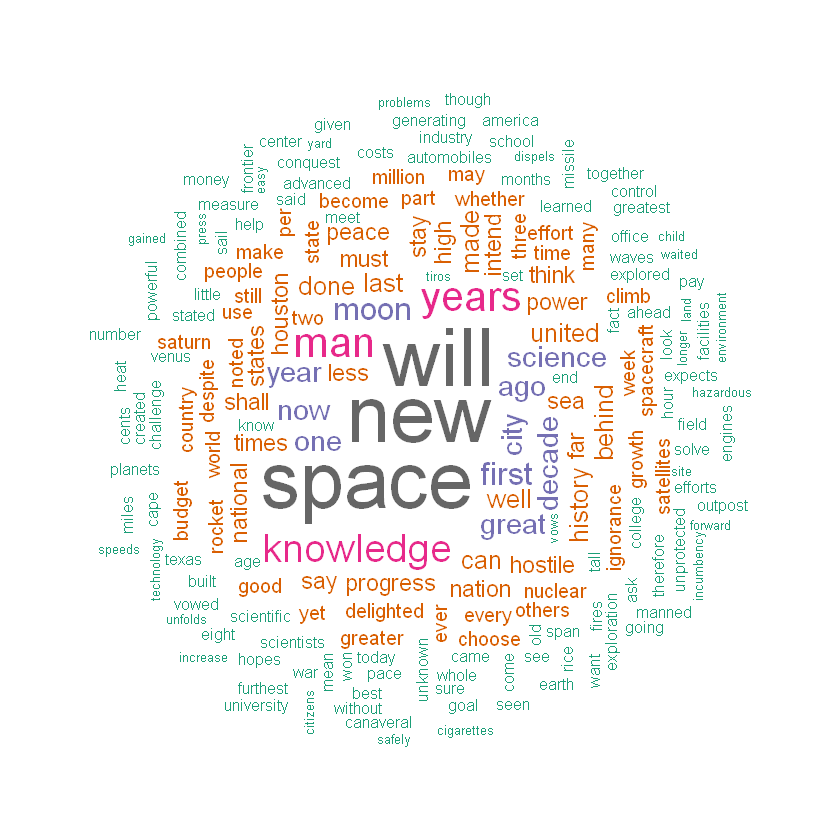

In [5]:
# Step 7
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 10)

set.seed(1234)# This makes the cloud reproducable.

wordcloud(words = d$word, freq = d$freq, min.freq = 1,
          max.words=200, random.order=FALSE, rot.per=0.35, 
          colors=brewer.pal(8, "Dark2"))

[1] "city"      "decade"    "knowledge" "progress"  "far"       "times"    
 [7] "years"     "ago"       "can"       "first"     "history"   "less"     
[13] "man"       "new"       "power"     "will"      "year"      "last"     
[19] "now"       "high"      "space"     "well"      "behind"    "houston"  
[25] "states"    "stay"      "united"    "great"     "must"      "nation"   
[31] "one"       "hostile"   "intend"    "made"      "moon"      "peace"    
[37] "shall"     "science"   "say"       "sea"       "national"  "done"     
[43] "think"

$freedom
     backwash        banner        beyond       certain        coming 
         1.00          1.00          1.00          1.00          1.00 
  destruction          eyes        filled          flag       founder 
         1.00          1.00          1.00          1.00          1.00 
   generation      governed    industrial   instruments     invention 
         1.00          1.00          1.00          1.00          1.00 
         lead          mass          mean        modern   revolutions 
         1.00          1.00          1.00          1.00          1.00 
         rode           see understanding         vowed          wave 
         1.00          1.00          1.00          1.00          1.00 
        waves       weapons         shall         first           age 
         1.00          1.00          0.81          0.77          0.70 
         came          look      conquest       planets         world 
         0.70          0.70          0.70          0.70          0.57 
      nuclear         power        intend         peace       country 
         0.57          0.49          0.49          0.49          0.44 
         part          made       hostile         space           now 
         0.44          0.43          0.39          0.36          0.33 
         moon 
         0.31

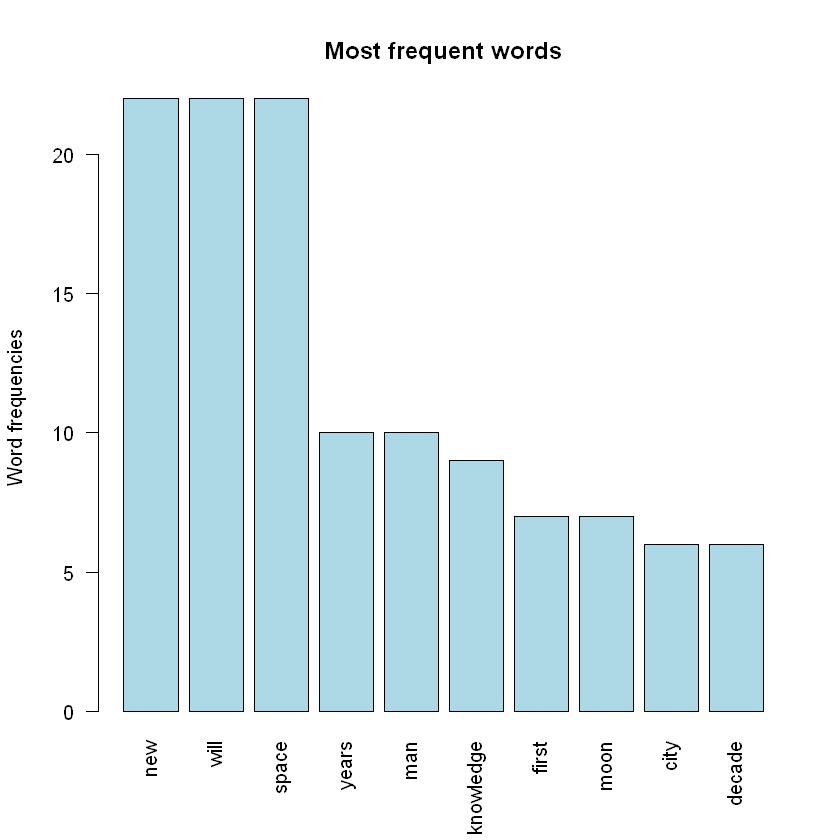

In [6]:
# Step 8
findFreqTerms(dtm, lowfreq = 4)
findAssocs(dtm, terms = "freedom", corlimit = 0.3)
barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
        col ="lightblue", main ="Most frequent words",
        ylab = "Word frequencies")

Warning message in readLines(filePath):
"incomplete final line found on 'https://raw.githubusercontent.com/CMorar143/datavis/master/Labs/Lab8/Data/kennedy_moon_speech.txt'"
Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
"transformation drops documents"


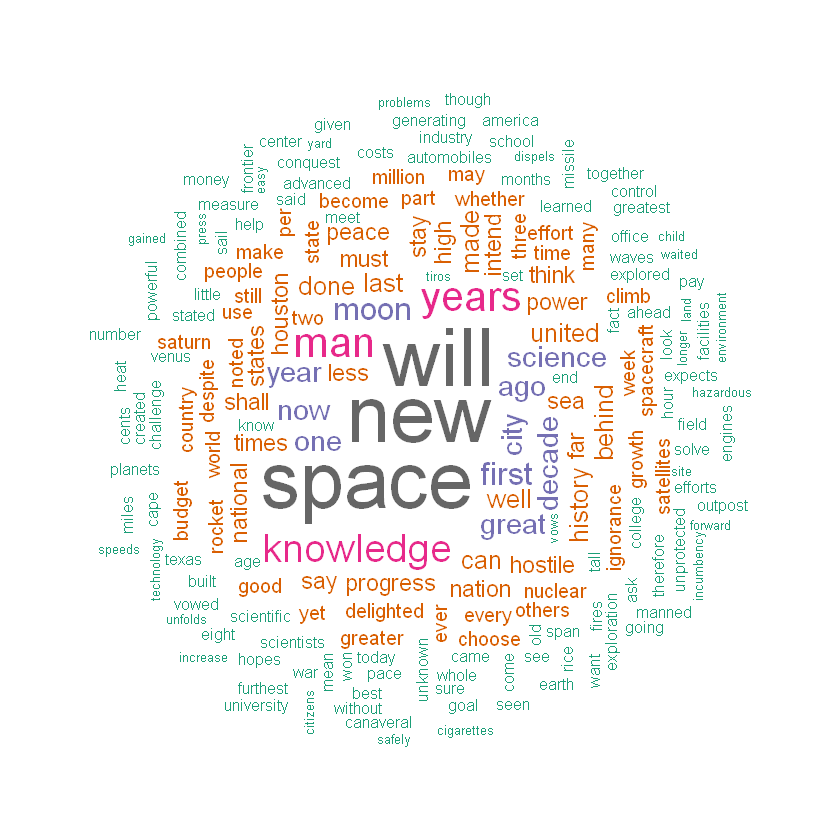

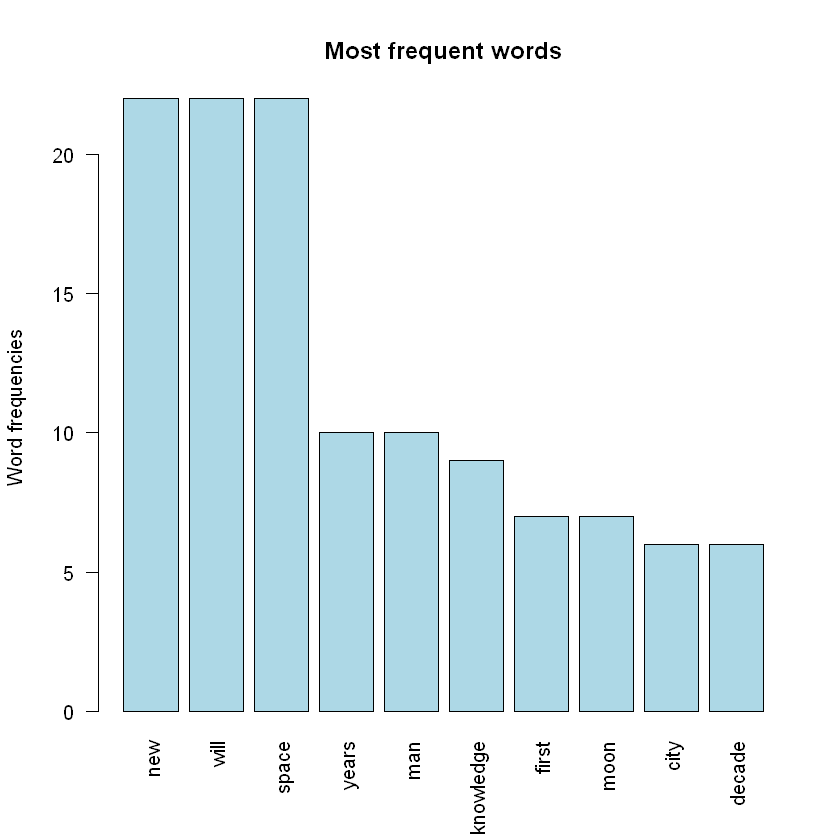

In [7]:
# Task 2
# Step 1
produce_cloud <- function(file_name) {
    docs <- Corpus(VectorSource(file_name))
    # Convert the text to lower case
    docs <- tm_map(docs, content_transformer(tolower))

    # Remove numbers
    docs <- tm_map(docs, removeNumbers)

    # Remove english common stopwords
    docs <- tm_map(docs, removeWords, stopwords("english"))

    # Remove punctuations
    docs <- tm_map(docs, removePunctuation)

    # Eliminate extra white spaces
    docs <- tm_map(docs, stripWhitespace)
    
    dtm <- TermDocumentMatrix(docs)
    m <- as.matrix(dtm)
    v <- sort(rowSums(m),decreasing=TRUE)
    d <- data.frame(word = names(v),freq=v)
    head(d, 10)

    set.seed(1234) # This makes the cloud reproducable.

    wordcloud(words = d$word, freq = d$freq, min.freq = 1,
              max.words=200, random.order=FALSE, rot.per=0.35, 
              colors=brewer.pal(8, "Dark2"))
    findFreqTerms(dtm, lowfreq = 4)
    findAssocs(dtm, terms = "freedom", corlimit = 0.3)
    barplot(d[1:10,]$freq, las = 2, names.arg = d[1:10,]$word,
            col ="lightblue", main ="Most frequent words",
            ylab = "Word frequencies")
}

filePath <- "https://raw.githubusercontent.com/CMorar143/datavis/master/Labs/Lab8/Data/kennedy_moon_speech.txt"
file_name <- readLines(filePath)
produce_cloud(file_name)

Warning message in readLines(filepath2):
"incomplete final line found on 'https://raw.githubusercontent.com/CMorar143/datavis/master/Labs/Lab8/Data/johnny.txt'"
Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
"transformation drops documents"


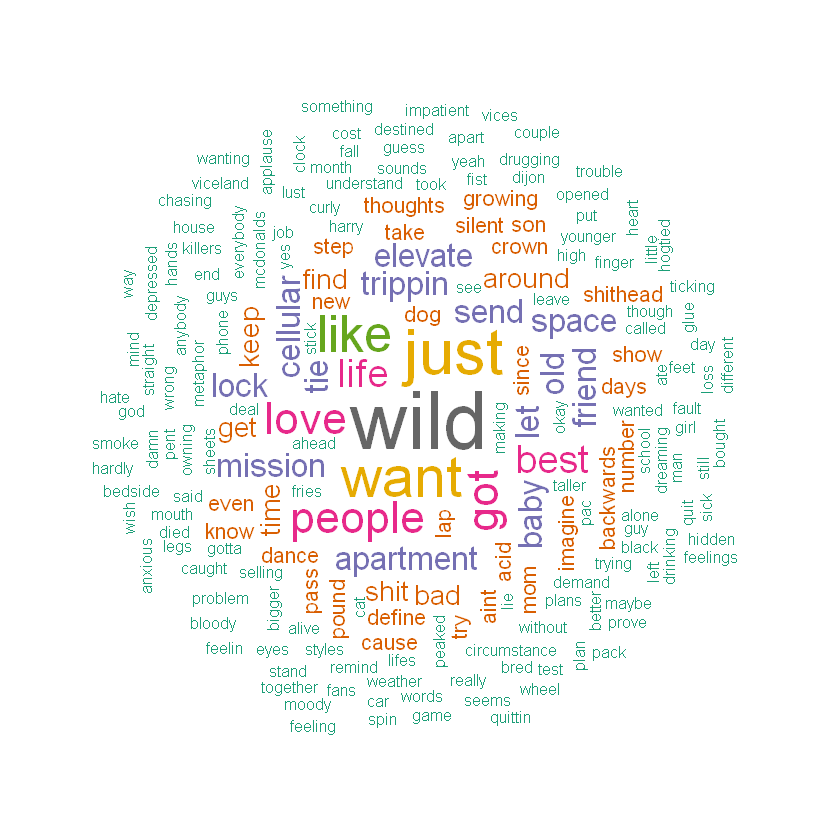

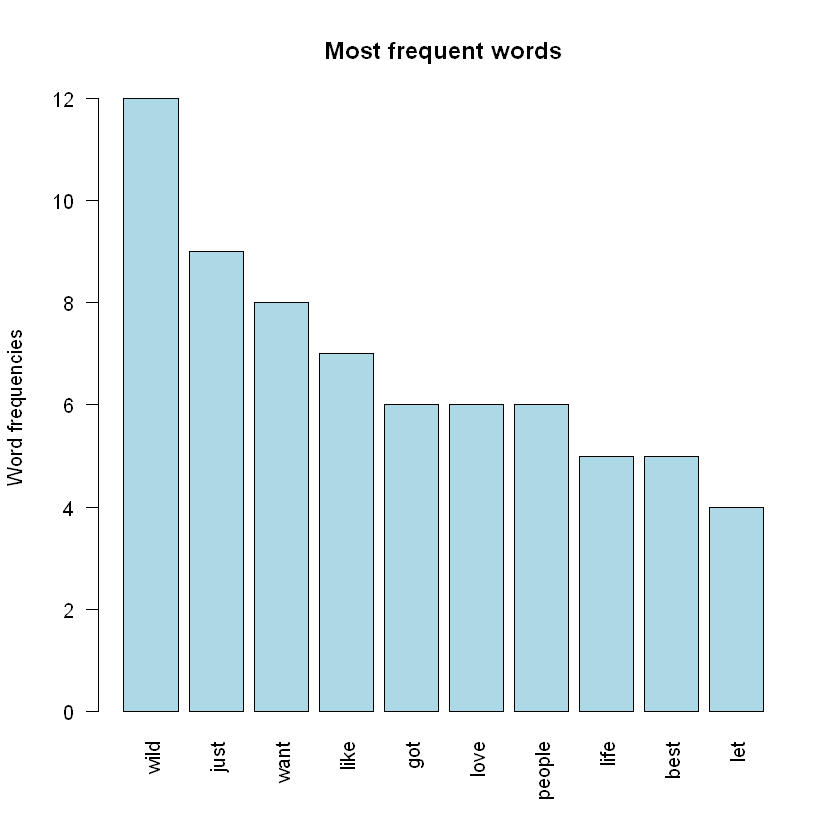

In [8]:
# Step 2
# Johnny lyrics Source: LyricFind
filepath2 <- "https://raw.githubusercontent.com/CMorar143/datavis/master/Labs/Lab8/Data/johnny.txt"

# Step 3
produce_cloud(readLines(filepath2))

In [9]:
# Step 4
# The moon speech has three common words. 
# Space, will, and new all appear 22 times.
# This makes sense as the speech is intended as an 
# aspirational goal of going to the moon.
# Space is the pathway to the moon, the word will shows
# their level of confidence, saying they "will" go to the moon.
# Finally, the fact that the word "new" shows up so often implies that
# this speech is the beginning of a new age, 
# one of exploration and human triumph.

# In the song Johnny by brockhampton, the word "wild" appears the most often,
# appearing a total of 12 times.
# This is followed the by the two next most common words "just" and "want".
# "just" appears a total of 9 times, while "want" appears total of 8 times.

# Both of these speeches follow the Zipf's law pretty well.
# Johnny follows the law moreclosely than the moon speech however.

In [10]:
# Task 3
# Step 1
# Zipf's law ranks how commonly words are used throughout a body of text. 
# For example, a book or a speech or a song.
# Basically it states that the frequency of a word is 
# inversely proportional to it's rank.

# Step 2
# The produce cloud function takes in the file name.
# It then proceeds to remove the common stopwords from the speech and song.
# This will end up pushing down the distribution of zipf's law within the 
# context of the song and speech.
# However, even with this fact, both the distributions still follow zipf's law
# very closely. The moon speech is a little less like it since there
# are three words that all appear the same number of times. However, 
# The distribution of the frequency of the words in johnny follow Zipf's law
# very closely.

# Step 3
# With the speech and the song, as with most textual data, 
# there are many features.
# A commonly used tactic for dealing with such high feature cardinality
# is to reduce the number of features within the data.
# This is why all the stopwords and punctuation is removed from the song/speech.
# Otherwise there would be far toomany features for a word cloud to be useful.
